## IMPORT PACKAGES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re
from wordcloud import WordCloud
import nltk
nltk.download(['stopwords','punkt','wordnet','omw-1.4','vader_lexicon'])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

## READING STEAM REVIEWS DATA INTO DATAFRAME

In [2]:
data = pd.read_csv('/content/steam_reviews_constructiveness_1.5k.csv')

## DATA EXPLORATION

In [3]:
data.head()

,id,game,review,author_playtime_at_review,voted_up,votes_up,votes_funny,constructive
0,1,Among Us,This game can suck my balls before I play it a...,6,False,1,0,0
1,2,Among Us,Very fun little party game! Even better with f...,11,True,0,0,1
2,3,Among Us,if you're lonely don't bother but if you're no...,40,True,2,1,0
3,4,Among Us,fun and anoyying,80,True,0,0,0
4,5,Among Us,when impostor is sus...,51,True,0,0,0


In [4]:
data.isnull().sum()

,0
id,0
game,0
review,0
author_playtime_at_review,0
voted_up,0
votes_up,0
votes_funny,0
constructive,0


## FREQUENCIES IN LABEL COLUMN

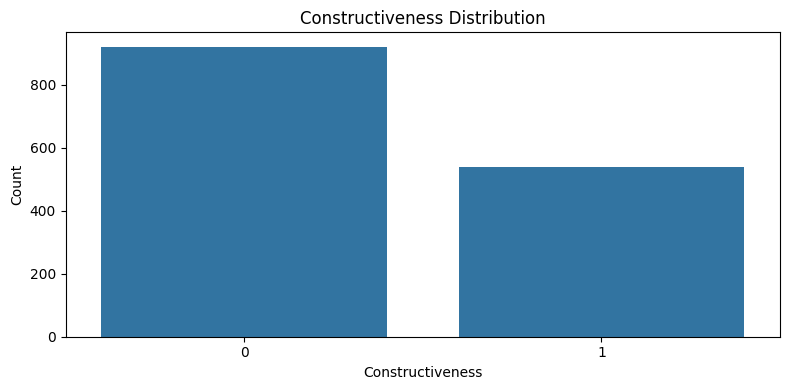

In [5]:
plt.figure(figsize=(8,4))
sns.countplot(x= data['constructive'])
plt.title('Constructiveness Distribution')
plt.xlabel('Constructiveness')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

## GAME DISTRIBUTION

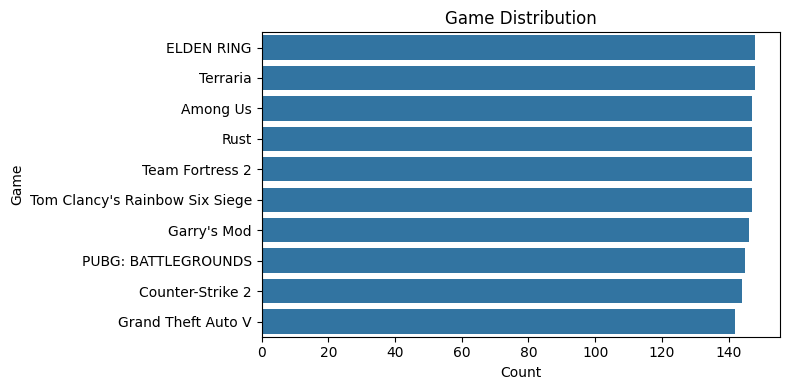

In [6]:
game_counts = data['game'].value_counts()

plt.figure(figsize=(8,4))
sns.barplot(y=game_counts.index, x=game_counts.values)
plt.title('Game Distribution')
plt.xlabel('Count')
plt.ylabel('Game')
plt.tight_layout()
plt.show()

## SELECTING TEXT AND LABEL COLUMNS

In [7]:
steam = data[['review','constructive']]
steam.head()

,review,constructive
0,This game can suck my balls before I play it a...,0
1,Very fun little party game! Even better with f...,1
2,if you're lonely don't bother but if you're no...,0
3,fun and anoyying,0
4,when impostor is sus...,0


## IMPORTING CORPUS OF STOPWORDS

In [8]:
stop_words = nltk.corpus.stopwords.words('english')
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

## DEFINING PRE-PROCESSING FUNCTION (TOKENIZATION, STOP WORDS REMOVAL, STEMMATIZATION)

In [9]:
def preprocess_text(text):
    tokenizer = nltk.tokenize.RegexpTokenizer('[a-zA-Z0-9\']+').tokenize(text) ## tokenize
    cleaned_tokens = [word.lower() for word in tokenizer if word.lower() not in stop_words] ## remove stop words
    stemmed_text = [nltk.stem.PorterStemmer().stem(word) for word in cleaned_tokens] ## stemming
    return stemmed_text

## APPLYING PRE-PROCESSING FUNCTION ON STEAM DATA

In [10]:
steam_tokenized = steam.copy()
steam_tokenized['review'] = steam_tokenized['review'].apply(preprocess_text)
steam_tokenized.head()

,review,constructive
0,"[game, suck, ball, play, fact, fuck, pay]",0
1,"[fun, littl, parti, game, even, better, friend...",1
2,"[lone, bother, fuck, loser, friend, good, time]",0
3,"[fun, anoyi]",0
4,"[impostor, su]",0


## GENERATING TERM FREQUENCY MATRIX USING COUNTVECTORIZER

In [11]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(steam_tokenized['review'].map(' '.join))
X = pd.DataFrame(X.toarray())
X.head()

,0,1,2,3,4,5,6,7,8,9,...,3945,3946,3947,3948,3949,3950,3951,3952,3953,3954
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## SPLITTING DATASET INTO TRAINING AND TEST DATASET

In [12]:
from sklearn.model_selection import train_test_split
y = steam['constructive']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, test_size= 0.2, random_state= 99 )

## BALANCE THE DATASET

<Axes: xlabel='constructive', ylabel='count'>

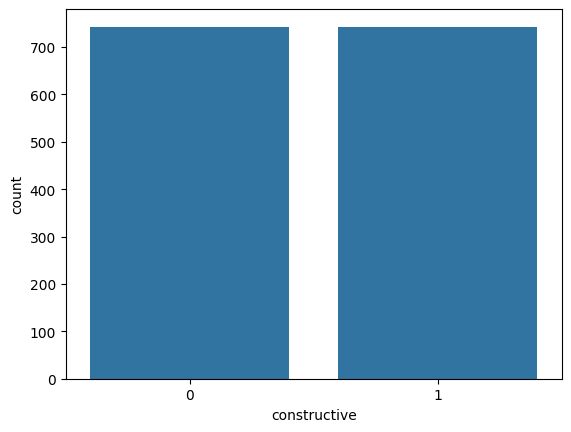

In [13]:
from imblearn.over_sampling import SMOTE

resampler = SMOTE(random_state=0)
X_train_smote, y_train_smote = resampler.fit_resample(X_train, y_train)

sns.countplot(x=y_train_smote)

## INITIATE MULTINOMIAL NAIVE BAYES MODEL

In [14]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(X_train_smote, y_train_smote)

MultinomialNB()

MultinomialNB()

## MODEL EVALUATION

In [15]:
y_pred = model.predict(X_test)

## Evaluate the model performance
from sklearn import metrics
acc = metrics.accuracy_score(y_test, y_pred)
print('accuracy:%.2f\n\n'%(acc))
cm = metrics.confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(cm,'\n\n')
print('------------------------------------------------------')
result = metrics.classification_report(y_test,y_pred)
print('Classification Report: \n')
print(result)

accuracy:0.74


Confusion Matrix:
[[107  71]
 [  6 109]] 


------------------------------------------------------
Classification Report: 

              precision    recall  f1-score   support

           0       0.95      0.60      0.74       178
           1       0.61      0.95      0.74       115

    accuracy                           0.74       293
   macro avg       0.78      0.77      0.74       293
weighted avg       0.81      0.74      0.74       293



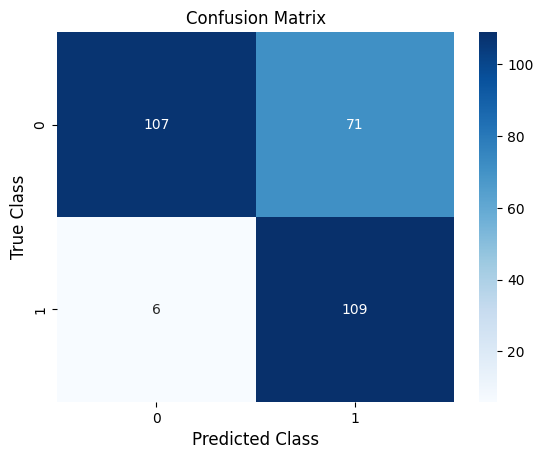

In [16]:
ax = sns.heatmap(cm, cmap='Blues',annot=True, fmt='d')
plt.xlabel("Predicted Class",fontsize=12)
plt.ylabel("True Class",fontsize=12)
plt.title("Confusion Matrix",fontsize=12)
plt.show()

## HYPERPARAMETER TUNING

In [18]:
from sklearn.model_selection import GridSearchCV

MNB = MultinomialNB()

param_grid = {
    'alpha': [0.001, 0.01, 0.1, 1.0, 10.0],
    'fit_prior': [True, False]
}

grid_search = GridSearchCV(estimator=MNB, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_smote, y_train_smote)

print("Best Parameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)

Best Parameters:  {'alpha': 0.1, 'fit_prior': True}
Best Score:  0.7530223939619913


In [19]:
## fitting best model
best_model = grid_search.best_estimator_
best_model.fit(X_train_smote, y_train_smote)

MultinomialNB(alpha=0.1)

In [20]:
## Model Evaluation
y_pred = best_model.predict(X_test)

## Evaluate the model performance
from sklearn import metrics
acc = metrics.accuracy_score(y_test, y_pred)
print('accuracy:%.2f\n\n'%(acc))
cm = metrics.confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(cm,'\n\n')
print('------------------------------------------------------')
result = metrics.classification_report(y_test,y_pred)
print('Classification Report: \n')
print(result)

accuracy:0.75


Confusion Matrix:
[[123  55]
 [ 17  98]] 


------------------------------------------------------
Classification Report: 

              precision    recall  f1-score   support

           0       0.88      0.69      0.77       178
           1       0.64      0.85      0.73       115

    accuracy                           0.75       293
   macro avg       0.76      0.77      0.75       293
weighted avg       0.79      0.75      0.76       293



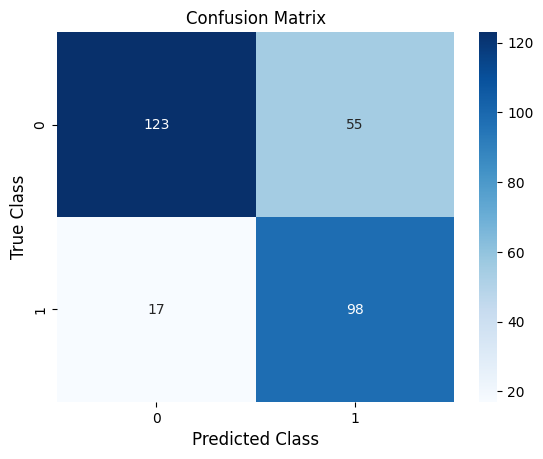

In [21]:
ax = sns.heatmap(cm, cmap='Blues',annot=True, fmt='d')
plt.xlabel("Predicted Class",fontsize=12)
plt.ylabel("True Class",fontsize=12)
plt.title("Confusion Matrix",fontsize=12)
plt.show()

## SENTIMENT ANALYSIS

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sentiment = SentimentIntensityAnalyzer()

In [ ]:
 sent_data = data.copy()

In [ ]:
sent_data.head()

,id,game,review,author_playtime_at_review,voted_up,votes_up,votes_funny,constructive
0,1,Among Us,This game can suck my balls before I play it a...,6,False,1,0,0
1,2,Among Us,Very fun little party game! Even better with f...,11,True,0,0,1
2,3,Among Us,if you're lonely don't bother but if you're no...,40,True,2,1,0
3,4,Among Us,fun and anoyying,80,True,0,0,0
4,5,Among Us,when impostor is sus...,51,True,0,0,0


## EXTRACTING VALUES FROM THE DICTIONARY AND CREATING NEW COLUMNS WITHIN THE DATAFRAME

In [ ]:
sent_data['compound'] = [sentiment.polarity_scores(review)['compound'] for review in sent_data['review']]
sent_data['neg'] = [sentiment.polarity_scores(review)['neg'] for review in sent_data['review']]
sent_data['neu'] = [sentiment.polarity_scores(review)['neu'] for review in sent_data['review']]
sent_data['pos'] = [sentiment.polarity_scores(review)['pos'] for review in sent_data['review']]

In [ ]:
sent_data.head()

,id,game,review,author_playtime_at_review,voted_up,votes_up,votes_funny,constructive,compound,neg,neu,pos
0,1,Among Us,This game can suck my balls before I play it a...,6,False,1,0,0,-0.1280,0.136,0.751,0.113
1,2,Among Us,Very fun little party game! Even better with f...,11,True,0,0,1,0.9207,0.000,0.533,0.467
2,3,Among Us,if you're lonely don't bother but if you're no...,40,True,2,1,0,0.9146,0.064,0.440,0.496
3,4,Among Us,fun and anoyying,80,True,0,0,0,0.5106,0.000,0.377,0.623
4,5,Among Us,when impostor is sus...,51,True,0,0,0,0.0000,0.000,1.000,0.000


## DATA OVERVIEW

In [ ]:
sent_data[['compound','neg','neu','pos']].describe()

,compound,neg,neu,pos
count,1461.000000,1461.000000,1461.000000,1461.000000
mean,0.280750,0.087909,0.658804,0.253293
std,0.522964,0.149565,0.228186,0.228384
min,-0.998100,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.500000,0.000000
50%,0.420100,0.000000,0.659000,0.218000
75%,0.726900,0.139000,0.812000,0.408000
max,0.999300,1.000000,1.000000,1.000000


## COMPOUND SCORE DISTRIBUTION

<Axes: xlabel='compound', ylabel='Count'>

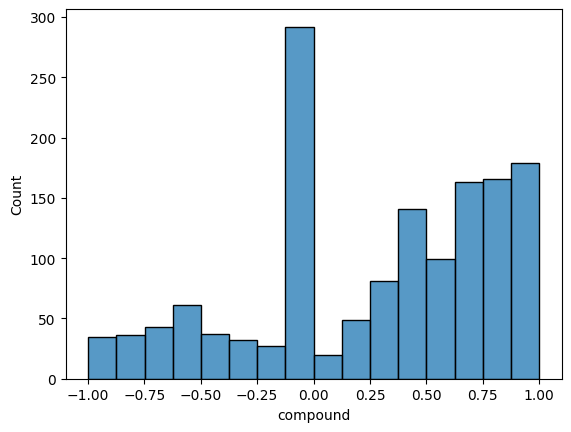

In [ ]:
sns.histplot(sent_data['compound'])

## POSITIVE SCORE DISTRIBUTION

<Axes: xlabel='pos', ylabel='Count'>

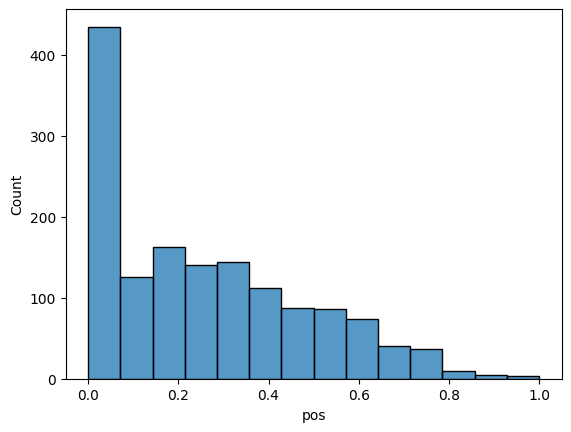

In [ ]:
sns.histplot(sent_data['pos'])

## NEGATIVE SCORE DISTRIBUTION

<Axes: xlabel='neg', ylabel='Count'>

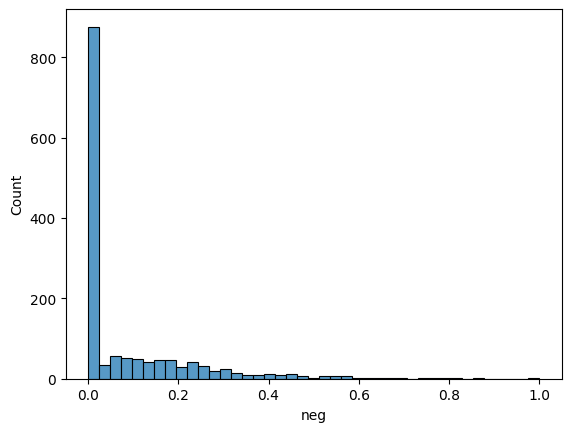

In [ ]:
sns.histplot(sent_data['neg'])

## NEUTRAL SCORE DISTRIBUTION

<Axes: xlabel='neu', ylabel='Count'>

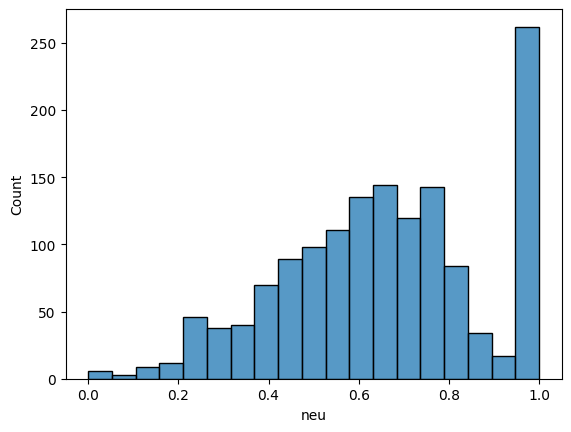

In [ ]:
sns.histplot(sent_data['neu'])

## REVIEWS PER PRODUCT

In [ ]:
(sent_data['compound']<=0).groupby(sent_data['game']).sum()

,compound
game,
Among Us,55
Counter-Strike 2,59
ELDEN RING,53
Garry's Mod,55
Grand Theft Auto V,53
PUBG: BATTLEGROUNDS,75
Rust,62
Team Fortress 2,48
Terraria,41


In [ ]:
## Calculating the % of negative reviews
percent_negative = pd.DataFrame((sent_data['compound']<=0).groupby(sent_data['game']).sum()/
                                    sent_data['game'].groupby(sent_data['game']).count()*100,
                                  columns=['% negative reviews']).sort_values(by = '% negative reviews')

percent_negative

,% negative reviews
game,
Terraria,27.702703
Team Fortress 2,32.653061
ELDEN RING,35.810811
Grand Theft Auto V,37.323944
Among Us,37.414966
Garry's Mod,37.671233
Counter-Strike 2,40.972222
Rust,42.176871
Tom Clancy's Rainbow Six Siege,42.176871


<Axes: xlabel='% negative reviews', ylabel='game'>

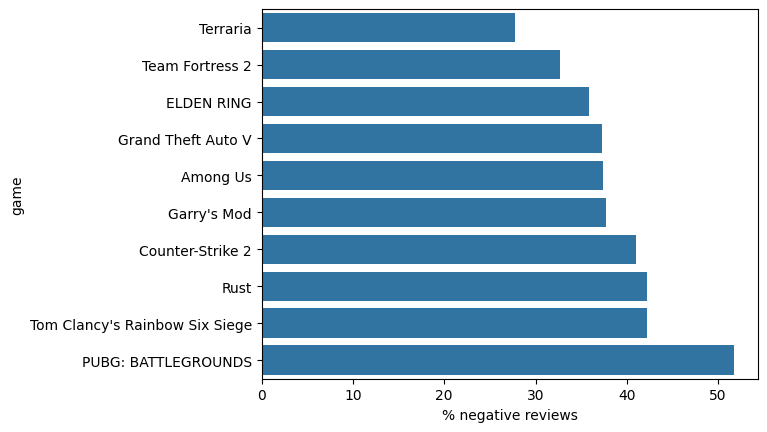

In [ ]:
sns.barplot(data=percent_negative, x= '% negative reviews', y=percent_negative.index)

In [ ]:
## Reviews per product
(sent_data['compound']>0).groupby(sent_data['game']).sum()

,compound
game,
Among Us,92
Counter-Strike 2,85
ELDEN RING,95
Garry's Mod,91
Grand Theft Auto V,89
PUBG: BATTLEGROUNDS,70
Rust,85
Team Fortress 2,99
Terraria,107


In [ ]:
## Calculating the % of positive reviews
percent_positive = pd.DataFrame((sent_data['compound']>0).groupby(sent_data['game']).sum()/
                                    sent_data['game'].groupby(sent_data['game']).count()*100,
                                  columns=['% positive reviews']).sort_values(by = '% positive reviews')

percent_positive

,% positive reviews
game,
PUBG: BATTLEGROUNDS,48.275862
Rust,57.823129
Tom Clancy's Rainbow Six Siege,57.823129
Counter-Strike 2,59.027778
Garry's Mod,62.328767
Among Us,62.585034
Grand Theft Auto V,62.676056
ELDEN RING,64.189189
Team Fortress 2,67.346939


<Axes: xlabel='% positive reviews', ylabel='game'>

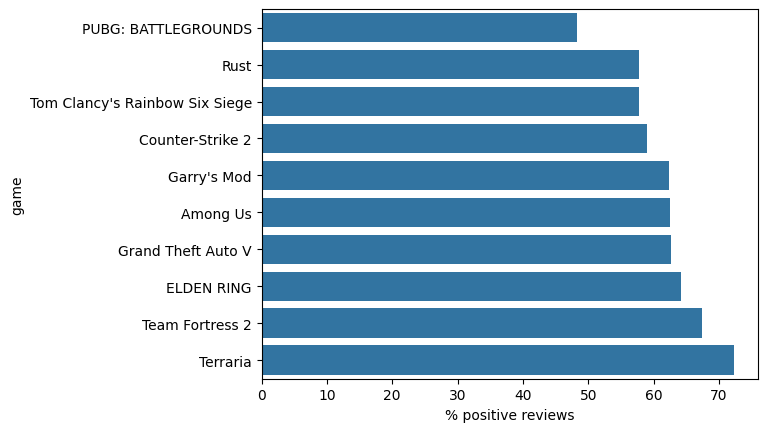

In [ ]:
sns.barplot(data=percent_positive, x= '% positive reviews', y=percent_positive.index)

## PREPROCESSING DATA FOR WORD CLOUD VISUALIZATION

In [ ]:
## Processing Data for world cloud viz, focusing on a few games
sent_data['processed_reviews'] = sent_data['review'].apply(preprocess_text)

games_to_analyze = ['Terraria', 'Team Fortress 2', 'Grand Theft Auto V']

positive_sent_datasubset = sent_data.loc[
    (sent_data['game'].isin(games_to_analyze)) &
    (sent_data['compound'] > 0),
    :]
negative_sent_datasubset = sent_data.loc[
    (sent_data['game'].isin(games_to_analyze)) &
    (sent_data['compound'] <= 0),
    :]

positive_sent_datasubset.head()

,id,game,review,author_playtime_at_review,voted_up,votes_up,votes_funny,constructive,compound,neg,neu,pos,processed_reviews
586,587,Grand Theft Auto V,ez hooker sex,680,True,0,0,0,0.3612,0.000,0.444,0.556,"[ez, hooker, sex]"
589,590,Grand Theft Auto V,Great single player story. Multiplayer is fun ...,193,True,0,0,1,0.8591,0.055,0.681,0.264,"[great, singl, player, stori, multiplay, fun, ..."
590,591,Grand Theft Auto V,GTA Online can factually be labeled as malware...,3921,False,0,0,1,0.4703,0.065,0.771,0.164,"[gta, onlin, factual, label, malwar, current, ..."
593,594,Grand Theft Auto V,you wont leave your bedroom,14,True,61,76,0,0.0382,0.000,0.777,0.223,"[wont, leav, bedroom]"
595,596,Grand Theft Auto V,I've played since GTA since it used to be a bi...,161,True,0,0,1,0.9601,0.000,0.689,0.311,"[i'v, play, sinc, gta, sinc, use, bird, eye, v..."


## WORD CLOUD

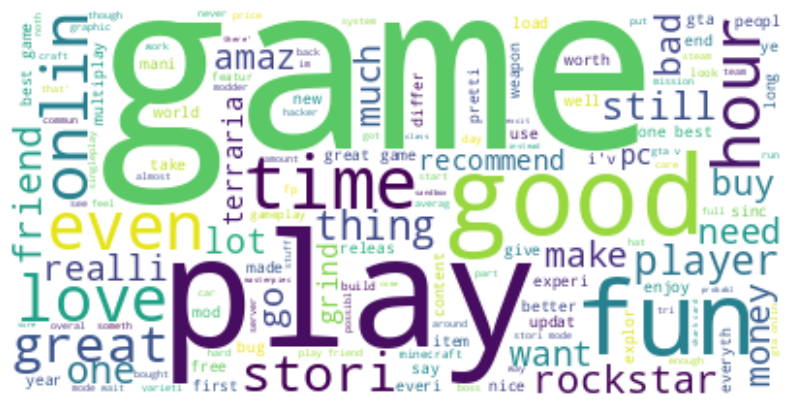

In [ ]:
## Wordcloud of words from positive reviews
pos_tokens = [word for review in positive_sent_datasubset['processed_reviews'] for word in review]
wordcloud = WordCloud(background_color='white').generate_from_text(' '.join(pos_tokens))

## Plotting the generated image
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

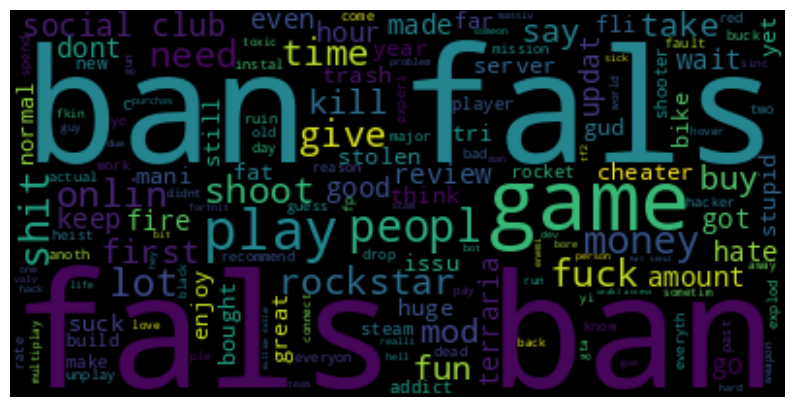

In [ ]:
## Wordcloud of words from negative reviews
neg_tokens = [word for review in negative_sent_datasubset['processed_reviews'] for word in review]
wordcloud = WordCloud(background_color='black').generate_from_text(' '.join(neg_tokens))

## Plotting the generated image
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## MOST FREQUENT WORDS

In [ ]:
## Checking the most frequent words
from nltk.probability import FreqDist
pos_fdist = FreqDist(pos_tokens)
pos_fdist.tabulate(10)

 game  play  good   fun  like   get great  time onlin    10 
  347   112   100    87    56    56    46    41    39    39 


In [ ]:
## Checking the most frequent words
from nltk.probability import FreqDist
neg_fdist = FreqDist(neg_tokens)
neg_fdist.tabulate(10)

  ban  fals  game  play   get    10 peopl  shit money   lot 
  593   585    56    17    11    11    10     8     7     7 


## DISTRIBUTION OF MOST FREQUENT WORDS

<Axes: xlabel='Samples', ylabel='Counts'>

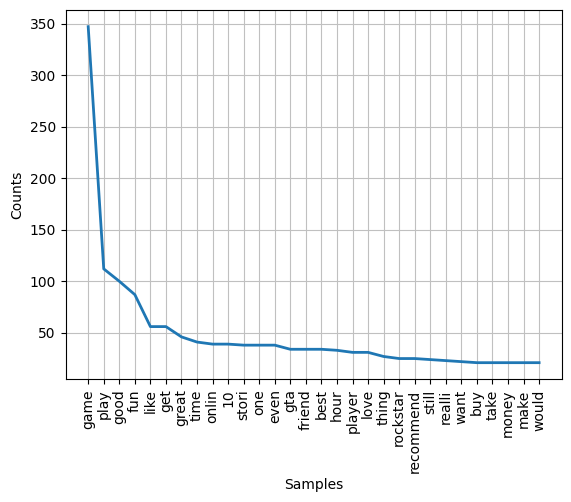

In [ ]:
## Plotting the frequency distribution
pos_fdist.plot(30,cumulative=False)

<Axes: xlabel='Samples', ylabel='Counts'>

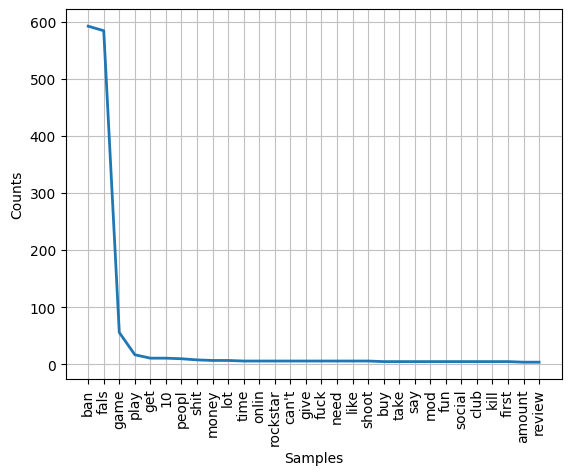

In [ ]:
## Plotting the frequency distribution
neg_fdist.plot(30,cumulative=False)